<a href="https://colab.research.google.com/github/illhyhl1111/SNU_ML2019/blob/master/Lab3_MNIST_cGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader

from torchvision.datasets import MNIST
from torchvision.transforms import Compose,ToTensor

from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import PIL

### GAN
#### Generator
- Generates fake images
- Get labels to generates specific images

In [0]:
class Generator(nn.Module):
    def __init__(self,latent_size):
        super(Generator,self).__init__()
        self.latent_size = latent_size

        self.gen_fc1 = nn.Linear(self.latent_size,128)
        self.label_fc = nn.Linear(10,128)
        self.gen_fc2 = nn.Linear(256,512)
        self.gen_fc3 = nn.Linear(512,784)

    def generator(self,label):
        batch_size = label.shape[0]
        z = torch.randn((batch_size,self.latent_size))
        if torch.cuda.is_available():
            z = z.cuda()

        gen = self.gen_fc1(z)
        gen_label = self.label_fc(label)
        gen = torch.cat((gen,gen_label),-1)
        gen = torch.relu(gen)
        gen = self.gen_fc2(gen)
        gen = torch.relu(gen)
        gen = self.gen_fc3(gen)
        img_ = torch.sigmoid(gen).view(-1,1,28,28)
        return img_

    def forward(self,label):
        img = self.generator(label)
        return img

#### Discriminator
- Find fake images

In [0]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()

        self.dis_fc1 = nn.Linear(784,512)
        self.dis_fc2 = nn.Linear(512,128)
        self.label_fc = nn.Linear(10,128)
        self.dis_fc3 = nn.Linear(256,32)
        self.dis_fc4 = nn.Linear(32,1)

    def discriminator(self,img,label):
        batch_size = img.shape[0]
        img = img.view(batch_size,-1)

        dis = self.dis_fc1(img)
        dis = torch.relu(dis)
        dis = self.dis_fc2(dis)
        dis = torch.relu(dis)
        dis_label = self.label_fc(label)
        dis = torch.cat((dis,dis_label),-1)
        dis = self.dis_fc3(dis)
        dis = torch.relu(dis)
        dis = self.dis_fc4(dis)
        dis = torch.sigmoid(dis)
        return dis

    def forward(self,img,label):
        criterion = self.discriminator(img,label)
        return criterion

#### Util functions

In [0]:
def one_hot(x):
    res = torch.zeros((x.shape[0],10))
    for i in range(x.shape[0]):
        res[i,x[i]]=1
    return res

#### Hyperparameters

In [0]:
NUM_EPOCHS = 150
BATCH_SIZE = 128
LATENT_SIZE = 100
LEARNING_RATE = 2e-4
EPS = 1e-6
LEARNING_RATIO = 1

#### Dataloader

In [0]:
transforms = Compose([
    ToTensor(),
])

trainset = MNIST('./',train=True,transform=transforms,download=True)
testset = MNIST('./',train=False,transform=transforms,download=True)

args = {
    'num_workers' : 1,
    'batch_size' : BATCH_SIZE,
    'shuffle' : True,
}

train_loader = DataLoader(trainset,**args)
test_loader = DataLoader(testset,**args)

#### Training part

number of parameters(generator) : 548112
number of parameters(discriminator) : 477249
epoch 1
 gen : 1577.23343	 dis : 202.47170


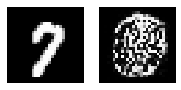

epoch 2
 gen : 2472.44031	 dis : 54.71094


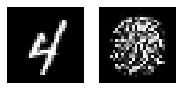

epoch 3
 gen : 2217.14509	 dis : 68.75194


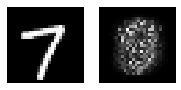

epoch 4
 gen : 1992.45320	 dis : 56.30719


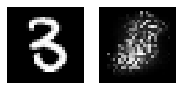

epoch 5
 gen : 3079.17243	 dis : 11.90217


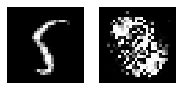

epoch 6
 gen : 3525.50468	 dis : 9.83074


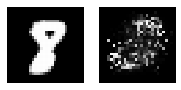

epoch 7
 gen : 3210.61423	 dis : 15.41533


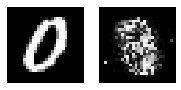

epoch 8
 gen : 3534.15378	 dis : 9.94062


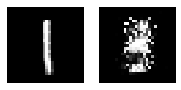

epoch 9
 gen : 3434.84503	 dis : 9.23741


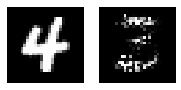

epoch 10
 gen : 3616.51885	 dis : 9.89008


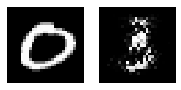

epoch 11
 gen : 3514.27949	 dis : 8.02604


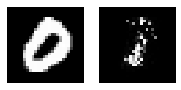

epoch 12
 gen : 4074.17644	 dis : 10.40215


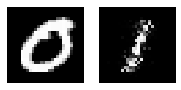

epoch 13
 gen : 3901.94428	 dis : 14.15100


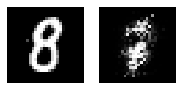

epoch 14
 gen : 3946.51566	 dis : 13.31543


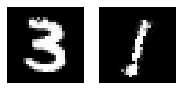

epoch 15
 gen : 3757.69068	 dis : 12.74750


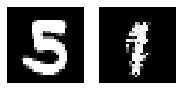

epoch 16
 gen : 3649.27340	 dis : 16.38611


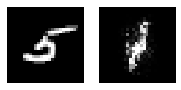

epoch 17
 gen : 3558.10534	 dis : 18.41881


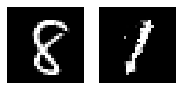

epoch 18
 gen : 3463.88787	 dis : 18.47853


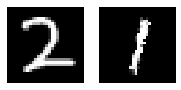

epoch 19
 gen : 3601.46970	 dis : 19.98879


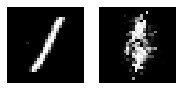

epoch 20
 gen : 3352.69036	 dis : 24.34979


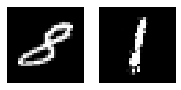

epoch 21
 gen : 3504.08322	 dis : 25.73492


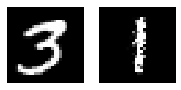

epoch 22
 gen : 3316.05029	 dis : 29.22302


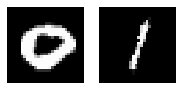

epoch 23
 gen : 3168.01281	 dis : 36.31563


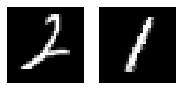

epoch 24
 gen : 3150.72223	 dis : 37.08826


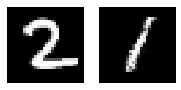

epoch 25
 gen : 3131.83409	 dis : 47.02591


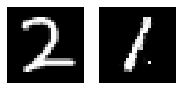

epoch 26
 gen : 3030.43425	 dis : 50.01399


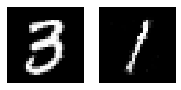

epoch 27
 gen : 2953.07756	 dis : 54.00689


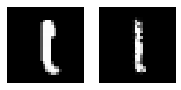

epoch 28
 gen : 2878.15098	 dis : 58.17454


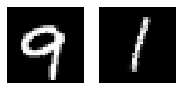

epoch 29
 gen : 2900.62904	 dis : 56.53469


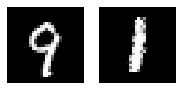

epoch 30
 gen : 2899.89035	 dis : 61.97882


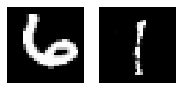

epoch 31
 gen : 2815.40727	 dis : 69.57972


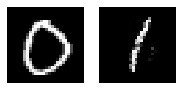

epoch 32
 gen : 2688.52133	 dis : 71.04406


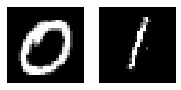

epoch 33
 gen : 2608.34472	 dis : 74.54986


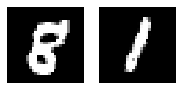

epoch 34
 gen : 2574.80186	 dis : 75.77802


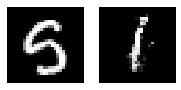

epoch 35
 gen : 2619.20413	 dis : 70.70726


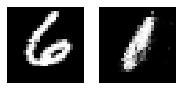

epoch 36
 gen : 2543.14999	 dis : 80.20248


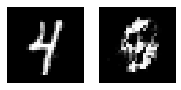

epoch 37
 gen : 2502.29944	 dis : 80.10699


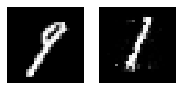

epoch 38
 gen : 2452.05140	 dis : 76.90436


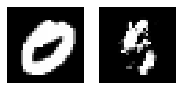

epoch 39
 gen : 2345.73785	 dis : 83.06601


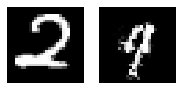

epoch 40
 gen : 2287.34686	 dis : 80.21999


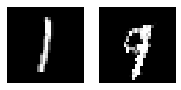

epoch 41
 gen : 2181.72904	 dis : 91.47214


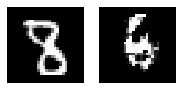

epoch 42
 gen : 2060.30196	 dis : 98.57380


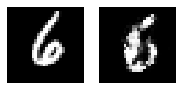

epoch 43
 gen : 2035.99984	 dis : 104.50964


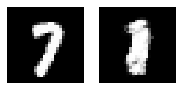

epoch 44
 gen : 2034.42687	 dis : 110.74724


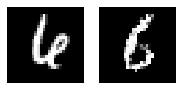

epoch 45
 gen : 2009.11628	 dis : 114.08207


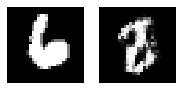

epoch 46
 gen : 2027.12961	 dis : 114.61292


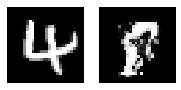

epoch 47
 gen : 1996.06994	 dis : 116.81675


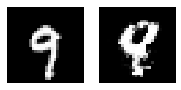

epoch 48
 gen : 1949.07117	 dis : 125.25060


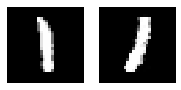

epoch 49
 gen : 1938.39425	 dis : 126.36452


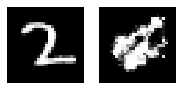

epoch 50
 gen : 1890.55733	 dis : 135.58861


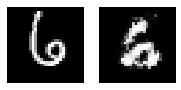

epoch 51
 gen : 1903.74916	 dis : 128.61707


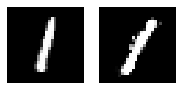

epoch 52
 gen : 1891.09455	 dis : 134.17218


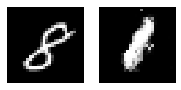

epoch 53
 gen : 1909.51676	 dis : 136.72483


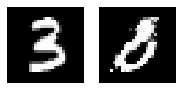

epoch 54
 gen : 1905.56956	 dis : 130.13204


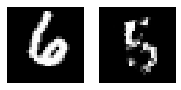

epoch 55
 gen : 1901.26121	 dis : 139.50448


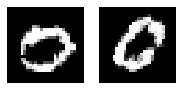

epoch 56
 gen : 1917.98389	 dis : 141.52634


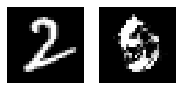

epoch 57
 gen : 1864.95332	 dis : 144.35963


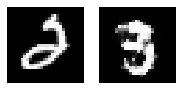

epoch 58
 gen : 1843.05615	 dis : 143.52577


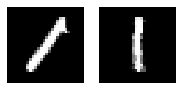

epoch 59
 gen : 1833.81376	 dis : 145.46146


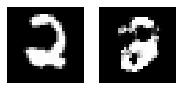

epoch 60
 gen : 1862.80383	 dis : 148.45670


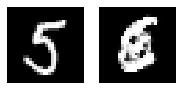

epoch 61
 gen : 1829.80211	 dis : 151.70011


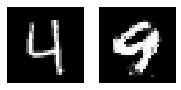

epoch 62
 gen : 1815.51391	 dis : 155.11510


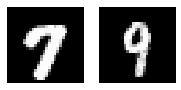

epoch 63
 gen : 1821.84691	 dis : 156.31511


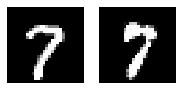

epoch 64
 gen : 1813.29303	 dis : 157.56761


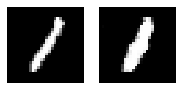

epoch 65
 gen : 1819.52861	 dis : 158.13203


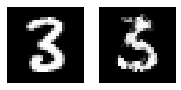

epoch 66
 gen : 1808.68641	 dis : 160.34987


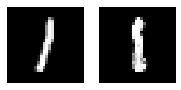

epoch 67
 gen : 1802.29049	 dis : 162.36762


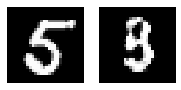

epoch 68
 gen : 1773.52908	 dis : 161.77232


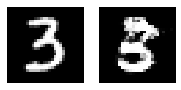

epoch 69
 gen : 1790.71617	 dis : 160.37417


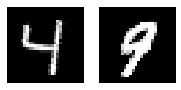

epoch 70
 gen : 1774.51647	 dis : 162.18628


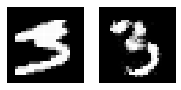

epoch 71
 gen : 1776.28317	 dis : 163.02896


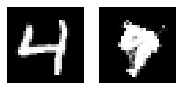

epoch 72
 gen : 1757.86721	 dis : 165.68114


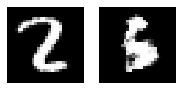

epoch 73
 gen : 1795.66260	 dis : 162.95443


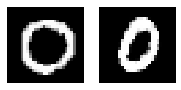

epoch 74
 gen : 1771.59141	 dis : 165.24804


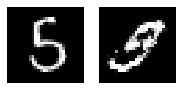

epoch 75
 gen : 1752.45606	 dis : 167.28401


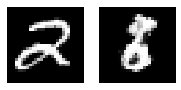

epoch 76
 gen : 1742.25922	 dis : 170.72157


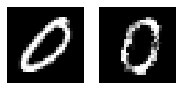

epoch 77
 gen : 1716.27020	 dis : 171.89566


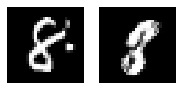

epoch 78
 gen : 1713.01889	 dis : 171.84388


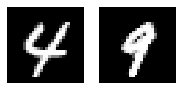

epoch 79
 gen : 1738.51956	 dis : 175.39600


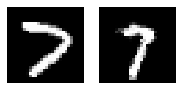

epoch 80
 gen : 1697.53704	 dis : 175.42091


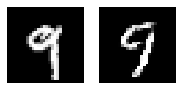

epoch 81
 gen : 1658.29462	 dis : 179.70504


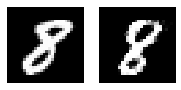

epoch 82
 gen : 1628.56728	 dis : 182.11104


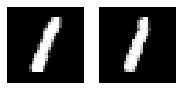

epoch 83
 gen : 1633.21310	 dis : 180.78943


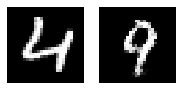

epoch 84
 gen : 1631.10668	 dis : 184.66932


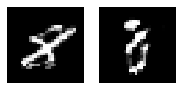

epoch 85
 gen : 1614.91846	 dis : 187.49127


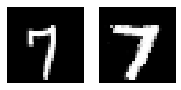

epoch 86
 gen : 1598.80263	 dis : 190.83996


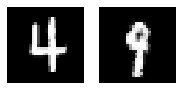

epoch 87
 gen : 1593.28302	 dis : 194.80086


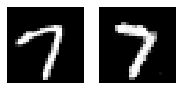

epoch 88
 gen : 1587.82222	 dis : 193.18774


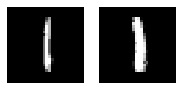

epoch 89
 gen : 1585.59054	 dis : 192.89605


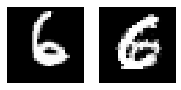

epoch 90
 gen : 1582.21225	 dis : 191.44657


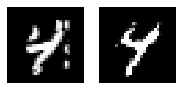

epoch 91
 gen : 1568.44850	 dis : 192.35743


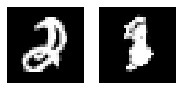

epoch 92
 gen : 1550.85197	 dis : 197.32264


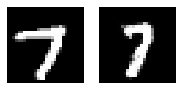

epoch 93
 gen : 1518.51307	 dis : 198.62037


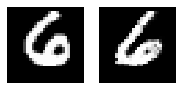

epoch 94
 gen : 1497.93541	 dis : 198.78841


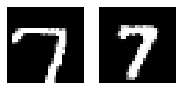

epoch 95
 gen : 1493.67611	 dis : 201.46657


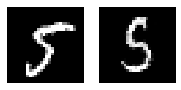

epoch 96
 gen : 1481.44004	 dis : 201.80883


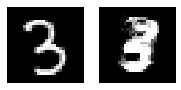

epoch 97
 gen : 1481.55838	 dis : 202.73829


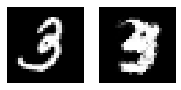

epoch 98
 gen : 1465.07941	 dis : 204.32982


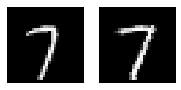

epoch 99
 gen : 1445.33606	 dis : 207.82099


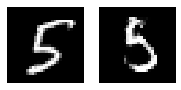

epoch 100
 gen : 1429.70126	 dis : 207.55371


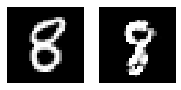

epoch 101
 gen : 1433.42022	 dis : 208.67508


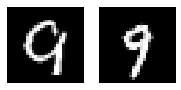

epoch 102
 gen : 1435.32709	 dis : 209.30826


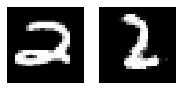

epoch 103
 gen : 1420.24070	 dis : 215.15373


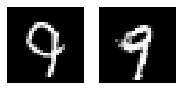

epoch 104
 gen : 1407.64941	 dis : 214.69213


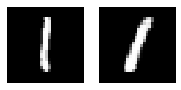

epoch 105
 gen : 1383.96587	 dis : 216.23188


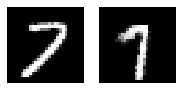

epoch 106
 gen : 1392.35410	 dis : 213.91587


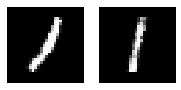

epoch 107
 gen : 1394.44814	 dis : 213.54480


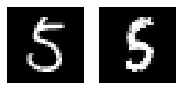

epoch 108
 gen : 1392.22516	 dis : 213.64754


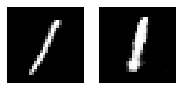

epoch 109
 gen : 1399.61079	 dis : 211.48870


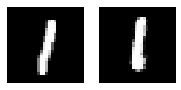

epoch 110
 gen : 1381.02518	 dis : 212.82905


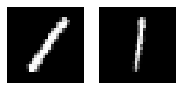

epoch 111
 gen : 1382.77094	 dis : 213.26671


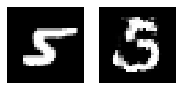

epoch 112
 gen : 1382.65260	 dis : 216.83538


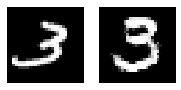

epoch 113
 gen : 1378.75357	 dis : 217.76553


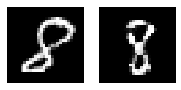

epoch 114
 gen : 1370.89889	 dis : 218.16668


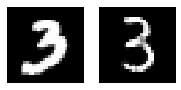

epoch 115
 gen : 1371.14855	 dis : 216.20546


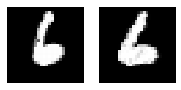

epoch 116
 gen : 1375.58701	 dis : 215.73798


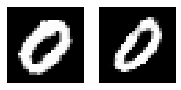

epoch 117
 gen : 1388.89056	 dis : 217.56724


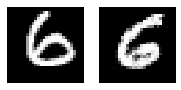

epoch 118
 gen : 1381.67098	 dis : 217.41128


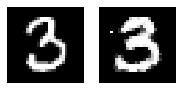

epoch 119
 gen : 1393.15858	 dis : 215.16177


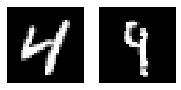

epoch 120
 gen : 1388.34834	 dis : 215.85189


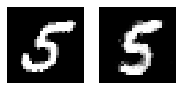

epoch 121
 gen : 1406.57630	 dis : 214.97959


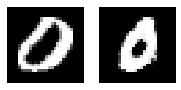

epoch 122
 gen : 1395.53779	 dis : 213.05935


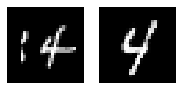

epoch 123
 gen : 1373.80800	 dis : 213.78257


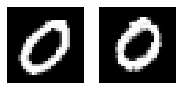

epoch 124
 gen : 1400.22454	 dis : 214.60585


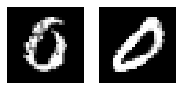

epoch 125
 gen : 1403.42099	 dis : 214.93461


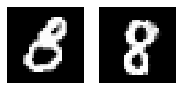

epoch 126
 gen : 1396.16741	 dis : 210.65772


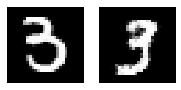

epoch 127
 gen : 1415.69232	 dis : 210.88834


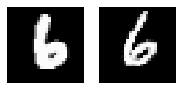

epoch 128
 gen : 1419.10874	 dis : 211.83724


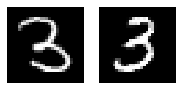

epoch 129
 gen : 1413.61007	 dis : 213.11856


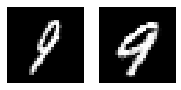

epoch 130
 gen : 1422.38937	 dis : 210.19631


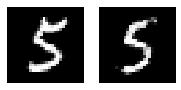

epoch 131
 gen : 1406.81468	 dis : 213.05974


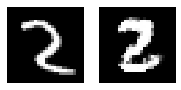

epoch 132
 gen : 1411.88327	 dis : 207.41924


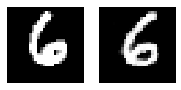

epoch 133
 gen : 1431.59328	 dis : 209.37196


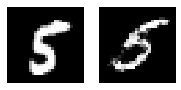

epoch 134
 gen : 1432.74393	 dis : 208.64316


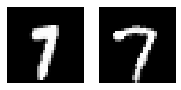

epoch 135
 gen : 1430.13332	 dis : 208.92713


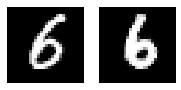

epoch 136
 gen : 1445.81120	 dis : 205.69557


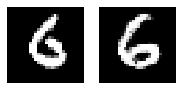

epoch 137
 gen : 1443.56586	 dis : 207.06134


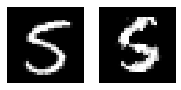

epoch 138
 gen : 1466.23578	 dis : 206.82775


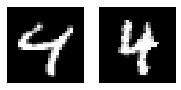

epoch 139
 gen : 1446.05439	 dis : 210.92187


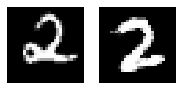

epoch 140
 gen : 1444.14167	 dis : 209.99352


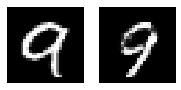

epoch 141
 gen : 1448.97879	 dis : 205.80230


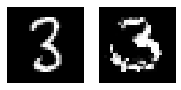

epoch 142
 gen : 1452.19716	 dis : 208.70645


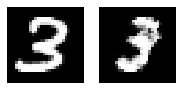

epoch 143
 gen : 1458.78994	 dis : 204.63168


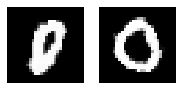

epoch 144
 gen : 1462.99436	 dis : 204.99158


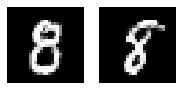

epoch 145
 gen : 1484.16591	 dis : 200.55886


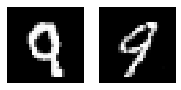

epoch 146
 gen : 1478.27209	 dis : 200.97723


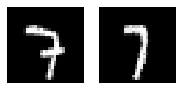

epoch 147
 gen : 1475.63603	 dis : 200.22583


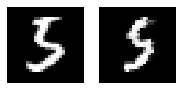

epoch 148
 gen : 1480.17942	 dis : 200.67969


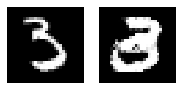

epoch 149
 gen : 1483.55665	 dis : 203.93736


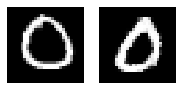

epoch 150
 gen : 1482.53830	 dis : 200.74892


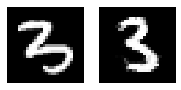

In [0]:
gen = Generator(LATENT_SIZE)
dis = Discriminator()
if torch.cuda.is_available():
    gen = gen.cuda()
    dis = dis.cuda()

gen_parameters = filter(lambda p: p.requires_grad, gen.parameters())
num_params = sum([np.prod(p.size()) for p in gen_parameters])
print("number of parameters(generator) : {}".format(num_params))
dis_parameters = filter(lambda p: p.requires_grad, dis.parameters())
num_params = sum([np.prod(p.size()) for p in dis_parameters])
print("number of parameters(discriminator) : {}".format(num_params))

optimizer_G = Adam(gen.parameters(),lr=LEARNING_RATE)
optimizer_D = Adam(dis.parameters(),lr=LEARNING_RATE)

for epoch in range(NUM_EPOCHS):
    tot_gen_loss = 0
    tot_dis_loss = 0
    cnt = 0
    for img,label in train_loader:
        onehot_label = one_hot(label)
        if torch.cuda.is_available():
            img = img.cuda()
            onehot_label = onehot_label.cuda()
        
        if cnt % LEARNING_RATIO == 0:
            optimizer_D.zero_grad()
            real = dis(img,onehot_label)
            img_ = gen(onehot_label)
            fake = dis(img_,onehot_label)
            dis_loss = -torch.mean(torch.log(real+EPS)+torch.log(1+EPS-fake))
            dis_loss.backward()
            optimizer_D.step()

        optimizer_G.zero_grad()
        img_ = gen(onehot_label)
        fake = dis(img_,onehot_label)
        gen_loss = -torch.mean(torch.log(fake+EPS))
        gen_loss.backward()
        optimizer_G.step()
        tot_dis_loss +=dis_loss.item()
        tot_gen_loss +=gen_loss.item()
        cnt+=1
    
    print("epoch {}\n gen : {:.5f}\t dis : {:.5f}".format(epoch+1,tot_gen_loss,tot_dis_loss))
    img, label = next(iter(test_loader))
    onehot_label = one_hot(label)
    if torch.cuda.is_available():
        onehot_label = onehot_label.cuda()
    img_ = gen(onehot_label)
    fig = plt.figure(figsize=(3,3))
    fig.add_subplot(1,2,1)
    plt.imshow(img[0].squeeze().numpy(),cmap='gray')
    plt.axis('off')
    img_out = img_[0].squeeze().cpu().detach().numpy()
    fig.add_subplot(1,2,2)
    plt.imshow(img_out,cmap='gray')
    plt.axis('off')
    plt.show()